In [1]:
import av
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

mdc = 0.5
mtc = 0.5

In [3]:
def track_hands_in_videos(image, min_detection_confidence=mdc, min_tracking_confidence=mtc):
    with mp_hands.Hands(
            max_num_hands=1,
            min_detection_confidence=min_detection_confidence,
            min_tracking_confidence=min_tracking_confidence,
            static_image_mode=False,
    ) as hands:
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        blank_annotated_image = np.zeros(image.shape, np.uint8)
        blank_annotated_image[:, :, :] = (255, 255, 255)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(blank_annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    return blank_annotated_image

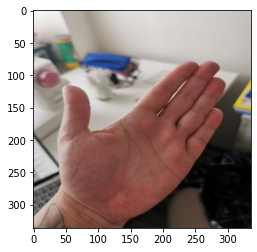

In [4]:
paper1 = cv2.imread("./pictures/paper/12.jpg")
paper2 = cv2.cvtColor(paper1, cv2.COLOR_BGR2RGB)
plt.imshow(paper2)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


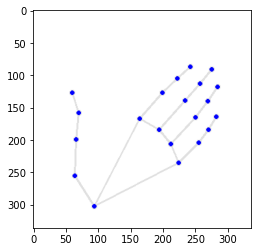

In [5]:
annotated_image = track_hands_in_videos(paper1)
plt.imshow(annotated_image)

In [6]:
# Extract HAND LANDMARKS from picture

hands = mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=mdc,
    min_tracking_confidence=mtc,
    static_image_mode=True,
)
result = hands.process(cv2.cvtColor(paper1, cv2.COLOR_BGR2RGB))


In [7]:
result.multi_handedness

[classification {
   index: 1
   score: 0.8879953026771545
   label: "Right"
 }]

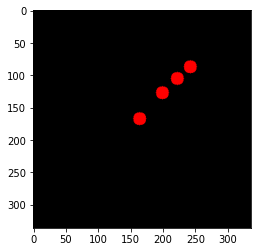

In [94]:
hand = result.multi_hand_landmarks[0]
image = np.zeros(paper1.shape, np.uint8)
width, height, _ = image.shape
finger_points = [
    mp_hands.HandLandmark.INDEX_FINGER_DIP,
    mp_hands.HandLandmark.INDEX_FINGER_MCP,
    mp_hands.HandLandmark.INDEX_FINGER_PIP,
    mp_hands.HandLandmark.INDEX_FINGER_TIP,
]
for fp in finger_points:
    x = hand.landmark[fp].x
    y = hand.landmark[fp].y
    cv2.circle(image, [int(x * height), int(y * width)], 10, [255,0,0], -1)
plt.imshow(image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


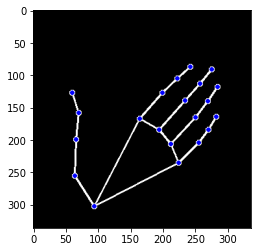

In [9]:
blank_annotated_image = np.zeros(paper1.shape, np.float32)

mp_drawing.draw_landmarks(blank_annotated_image, result.multi_hand_landmarks[0], mp_hands.HAND_CONNECTIONS)
plt.imshow(blank_annotated_image)

0.7604682445526123


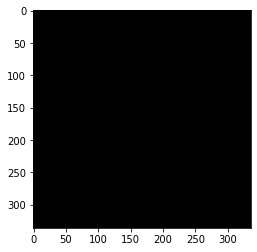

In [22]:
print(result.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.PINKY_PIP].x)
blank_annotated_image = np.zeros(paper1.shape, np.float32)

plt.imshow(blank_annotated_image)












